In [1]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/MnOxSpEC/2024-07-31-MnOx-attempt2/water_cyclopentene/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/MnOxSpEC/2024-07-31-MnOx-attempt2/water_cyclopentene/CV-3.3.0.0__0.csv


In [3]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

0
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/Users/benj/Documents/HiSPEC-analysis-2/SEC_Class_working.py:92: RuntimeWarning: divide by zero encountered in scalar divide
  initial_guess = [startin_samp, x_data.max() / max_cycles, starting_phase, starting_offset]
/Users/benj/anaconda3/envs/pymc_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:589: RuntimeWarning: invalid value encountered in scalar subtract
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.


LinAlgError: SVD did not converge in Linear Least Squares

In [7]:
test=SpEC1.CV
test

,t_s,Ewe_V,I_A,Cycle
0,0.010000,0.530181,0.001190,0
1,0.020000,0.530520,0.001072,0
2,0.030000,0.530739,0.000989,0
3,0.040000,0.530933,0.000928,0
4,0.050000,0.531129,0.000875,0
...,...,...,...,...
2290,22.910000,0.760245,0.000095,0
2291,22.920000,0.760361,0.000094,0
2292,22.930000,0.760440,0.000096,0
2293,22.939999,0.760552,0.000094,0


: 

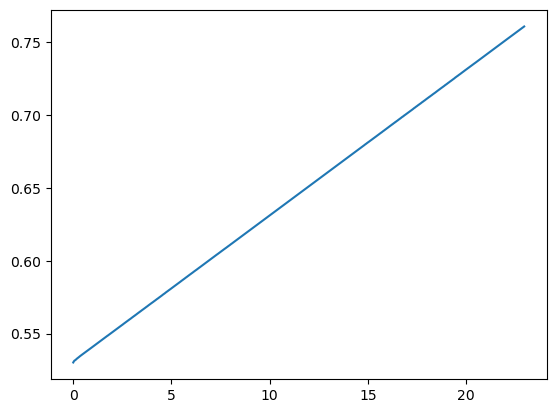

In [6]:
# plot the second and third collumns of test using iloc
plt.plot(test.iloc[:,0], test.iloc[:,1])

(6701, 2)


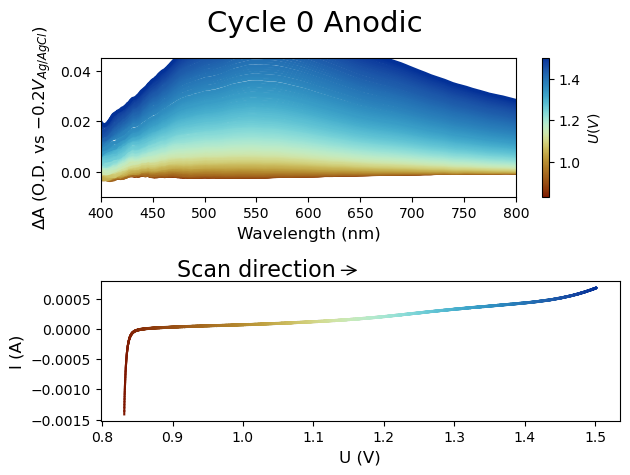

(6700, 2)


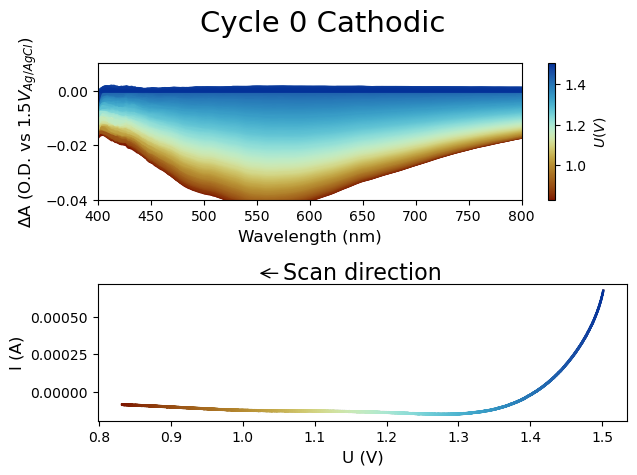

(6700, 2)


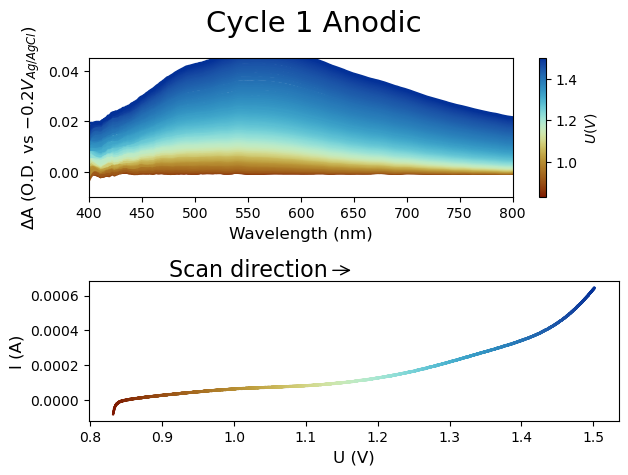

(6700, 2)


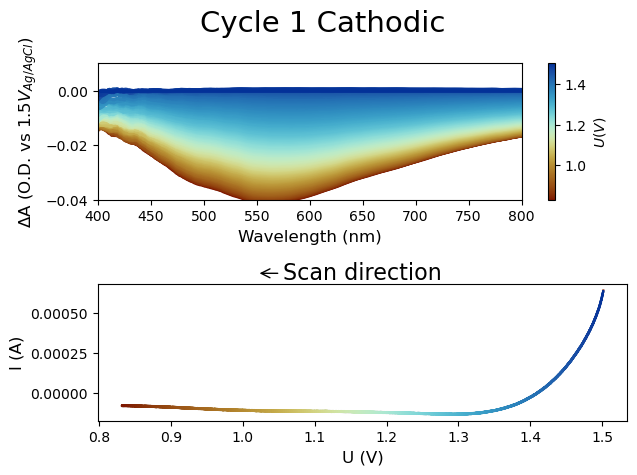

(6700, 2)


KeyboardInterrupt: 

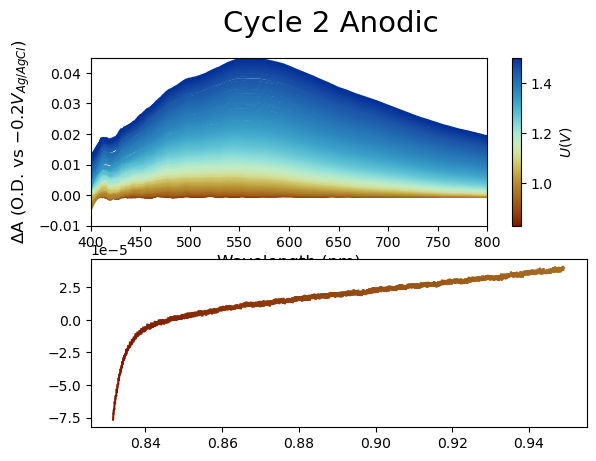

In [ ]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.045, y_min=-0.01,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 1.5, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.01, y_min=-0.04,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

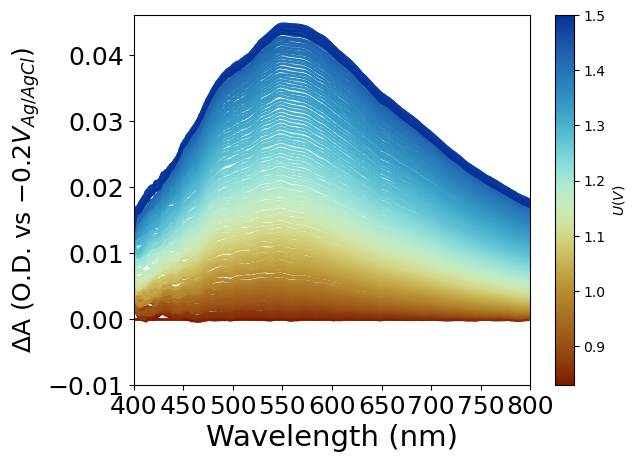

In [ ]:
data, ref=sp.calculateDOD(SpEC1, 0, 'Cathodic', -0.2, 21)
sp.plot_DOD(data, y_max=0.046, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

In [ ]:
data=sp.calculateDOD(SpEC1, 0, 'Anodic', -0.2, 21)[0]
data

Voltage (V),0.830,0.835,0.840,0.845,0.850,0.855,0.860,0.865,0.870,0.875,...,1.455,1.460,1.465,1.470,1.475,1.480,1.485,1.490,1.495,1.500
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
400,0.0,0.002446,0.001903,0.001553,0.002501,0.000471,0.000637,0.002576,0.001271,0.000806,...,0.014048,0.016183,0.014405,0.016482,0.017046,0.019618,0.019560,0.019719,0.020154,0.019350
401,0.0,0.001839,0.001489,0.000910,0.001380,0.000006,0.000265,0.001560,0.000695,0.000283,...,0.014284,0.015942,0.014866,0.016333,0.017170,0.019020,0.018963,0.019071,0.019450,0.018719
402,0.0,0.001311,0.001087,0.000347,0.000439,-0.000415,-0.000098,0.000683,0.000170,-0.000196,...,0.014555,0.015850,0.015333,0.016319,0.017339,0.018615,0.018581,0.018680,0.019004,0.018347
403,0.0,0.000857,0.000700,-0.000142,-0.000337,-0.000792,-0.000450,-0.000065,-0.000305,-0.000629,...,0.014859,0.015890,0.015805,0.016427,0.017550,0.018385,0.018394,0.018519,0.018789,0.018204
404,0.0,0.000472,0.000331,-0.000560,-0.000961,-0.001128,-0.000787,-0.000693,-0.000730,-0.001019,...,0.015191,0.016048,0.016280,0.016642,0.017800,0.018312,0.018381,0.018558,0.018777,0.018263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.000113,0.000509,0.000489,0.000475,0.000429,0.000391,0.000394,0.000366,0.000310,...,0.014783,0.015221,0.015587,0.015836,0.016246,0.016570,0.016978,0.017272,0.017649,0.017821
939,0.0,0.000112,0.000499,0.000499,0.000498,0.000428,0.000378,0.000399,0.000377,0.000304,...,0.014747,0.015150,0.015514,0.015758,0.016158,0.016496,0.016930,0.017212,0.017601,0.017777
940,0.0,0.000100,0.000473,0.000502,0.000521,0.000413,0.000354,0.000397,0.000382,0.000289,...,0.014708,0.015064,0.015428,0.015659,0.016052,0.016407,0.016876,0.017139,0.017544,0.017726


(-0.0002, 0.002)

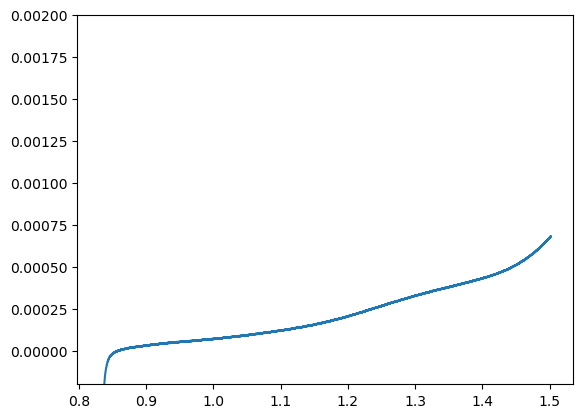

In [ ]:
test=SpEC1.CV_scans[0]['Anodic']

# plot the fist and second collumns of test

plt.plot(test.iloc[:,1], test.iloc[:,2])
# set the y range from -0.0001 to 0.002
plt.ylim(-0.0002, 0.002)
#

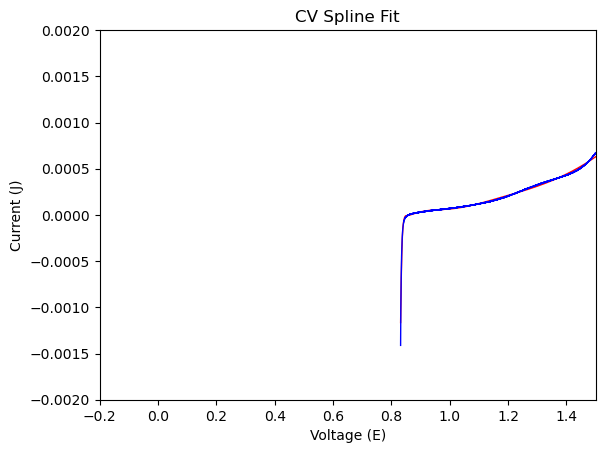

array(-373.89334287)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





In [ ]:
sorted_indices

0          0
1          1
2          2
3          3
4          4
        ... 
6696    6696
6697    6697
6698    6698
6699    6699
6700    6700
Name: Ewe_V, Length: 6701, dtype: int64

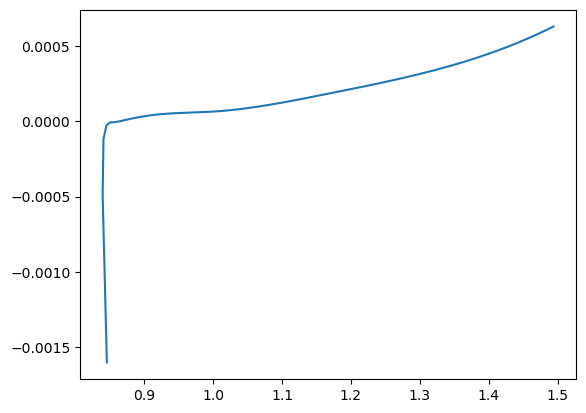

In [ ]:
Spectral_voltages=data.columns.values
Spectral_currents=spl(Spectral_voltages)

Cell_resistance=10 # ohms

iR=Cell_resistance*Spectral_currents

Spectral_voltages_corrected=Spectral_voltages-iR

plt.plot(Spectral_voltages_corrected, Spectral_currents)



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

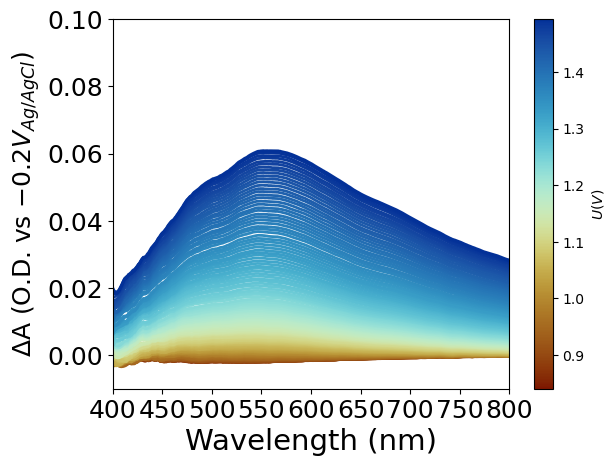

In [ ]:
# use Spectral_voltages_corrected as the collumn names for the data

data_iR=data.copy(deep=True) 

data_iR.columns=Spectral_voltages_corrected

data_iR

# use plot_DOD to plot the data_iR

sp.plot_DOD(data_iR, y_max=0.1, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

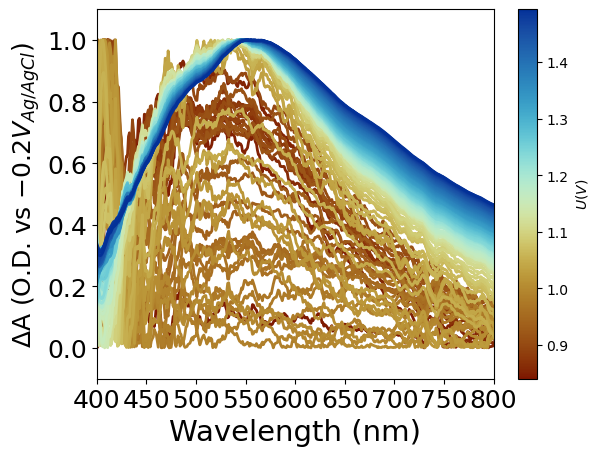

In [ ]:

# normalise the data_iR

data_iR_norm=sp.normalise_DOD(data_iR.abs())

# plot the normalised data_iR📈

sp.plot_DOD(data_iR_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

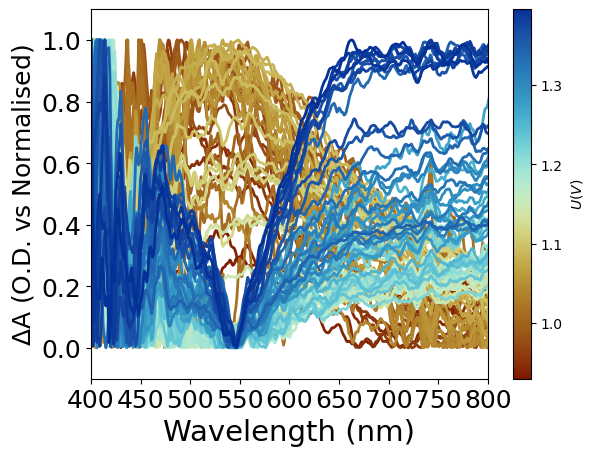

In [ ]:
# loop though data_iR_norm and from collumn 20 to collumn n-20 
# subtract collumn 20 from collumn i-20, put this into a new dataframe called data_iR_norm_diff

step=20
data_iR_diff=pd.DataFrame()
for i in range(step, len(data_iR_norm.columns)-step):
    data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
    # apply a savinky golay filter to the data_iR_norm_diff using the function savgol_filter from scipy.signal
    data_iR_diff[data_iR_norm.columns[i]]=signal.savgol_filter(data_iR_diff[data_iR_norm.columns[i]], 5, 3)

    
# normalise the data_iR_diff

data_iR_diff_norm=sp.normalise_DOD(data_iR_diff.abs())


sp.plot_DOD(data_iR_diff_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")




In [ ]:
print(data_iR_diff_norm.columns.values[0], data_iR_diff_norm.columns.values[50], data_iR_diff_norm_U.columns.values[90])

NameError: name 'data_iR_diff_norm_U' is not defined

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

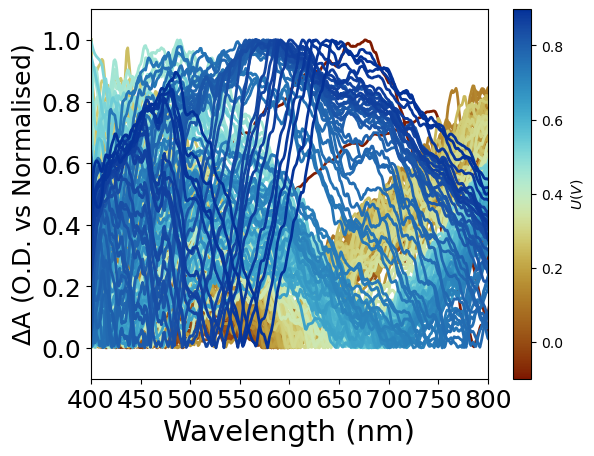

In [ ]:
Ustart=data_iR_diff_norm.columns.values[0]
Uend=data_iR_diff_norm.columns.values[200]


# get the data between Ustart and Uend

data_iR_diff_norm_U=data_iR_diff_norm.loc[:, Ustart:Uend]

# plot the data_iR_diff_norm_U

sp.plot_DOD(data_iR_diff_norm_U, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")